In [28]:
from importlib import reload
import pandas as pd
from IPython.core.display import HTML
import mode_notebook_assets.practical_dashboard_displays as dis
reload(dis)

<module 'mode_notebook_assets.practical_dashboard_displays' from '/Users/joelbecker/src/github.com/Shopify/mode-notebook-assets/mode_notebook_assets/practical_dashboard_displays.py'>

In [29]:
# read test series
_ts_path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
_ts = pd.read_csv(_ts_path)\
        .set_index('Month')['Sales']

_births_ts_path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
_births_ts = pd.read_csv(_births_ts_path).set_index('Date')['Births']

In [30]:
dis.MetricEvaluationPipeline(
    _ts,
    check_change_in_steady_state_long=False,
    check_sudden_change=False,
    check_outside_of_normal_range=False,
).display_actionability_time_series(
    title='Tophat time series without checks',
    metric_name='Sales',
)

In [31]:
dis.MetricEvaluationPipeline(
    _ts,
).display_actionability_time_series(
    title='Tophat time series with checks',
    metric_name='Sales',
)

In [32]:
dis.MetricEvaluationPipeline(
    _births_ts,
).display_actionability_time_series(
    title='Tophat time series with checks many periods',
    metric_name='Births'
)

In [33]:
dis.MetricEvaluationPipeline(
    _ts,
).display_actionability_time_series(
    title='Tophat time series with checks and legend',
    metric_name='Sales',
    show_legend=True,
)

In [34]:
print('Tophat Get Current Actionability Status')
dis.MetricEvaluationPipeline(
    _ts,
).get_current_actionability_status()


Tophat Get Current Actionability Status


0.849165534557318

Tophat Get Current Actionability Dot



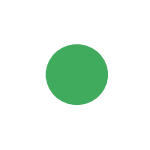
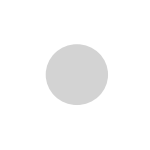
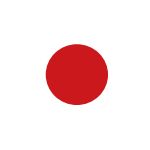

In [36]:
print('Tophat Get Current Actionability Dot')
_good_pipeline = dis.MetricEvaluationPipeline(_ts)
_bad_pipeline = dis.MetricEvaluationPipeline(
    pd.Series(
        list(_ts[:-1])+[_good_pipeline.get_current_record()['low_l1_threshold_value']],
        index=_ts.index
    )
)
_neutral_pipeline = dis.MetricEvaluationPipeline(
    pd.Series(
        list(_ts[:-1])+[_good_pipeline.get_current_record()['normal_range_rolling_baseline']],
        index=_ts.index
    )
)

dis.html_div_grid(html_elements=[
  _good_pipeline.get_current_actionability_status_dot(),
  _neutral_pipeline.get_current_actionability_status_dot(),
  _bad_pipeline.get_current_actionability_status_dot(),
])